
AIDS Virus Infection Prediction 💉
Classify the patients whether they are infected or not
Last Updated: 3 days ago (Version 1)

About this Dataset
Context :
Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996.

Attribute Information :
- time: time to failure or censoring
- trt: treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)
- age: age (yrs) at baseline
- wtkg: weight (kg) at baseline
- hemo: hemophilia (0=no, 1=yes)
- homo: homosexual activity (0=no, 1=yes)
- drugs: history of IV drug use (0=no, 1=yes)
- karnof: Karnofsky score (on a scale of 0-100)
- oprior: Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)
- z30: ZDV in the 30 days prior to 175 (0=no, 1=yes)
- preanti: days pre-175 anti-retroviral therapy
- race: race (0=White, 1=non-white)
- gender: gender (0=F, 1=M)
- str2: antiretroviral history (0=naive, 1=experienced)
- strat: antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)
- symptom: symptomatic indicator (0=asymp, 1=symp)
- treat: treatment indicator (0=ZDV only, 1=others)
- offtrt: indicator of off-trt before 96+/-5 weeks (0=no,1=yes)
- cd40: CD4 at baseline
- cd420: CD4 at 20+/-5 weeks
- cd80: CD8 at baseline
- cd820: CD8 at 20+/-5 weeks
- infected: is infected with AIDS (0=No, 1=Yes)
Additional Variable Information :
- Personal information (age, weight, race, gender, sexual activity)
- Medical history (hemophilia, history of IV drugs)
- Treatment history (ZDV/non-ZDV treatment history)
- Lab results (CD4/CD8 counts)
- Citation :
https://classic.clinicaltrials.gov/ct2/show/NCT00000625

Acknowledgment :
Creators :
- S. Hammer
- D. Katzenstein
- M. Hughes
- H. Gundacker
- R. Schooley
- R. Haubrich
- W. K.
- M. Lederman
- J. Phair
- M. Niu
- M. Hirsch
- T. Merigan

Donor :
https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("research/data/data.csv")

In [3]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [4]:
df.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,...,0,1,0,1,0,911,930,885,526,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [6]:
df.describe().T.style.background_gradient(cmap='inferno')

,count,mean,std,min,25%,50%,75%,max
time,2139.000000,879.098177,292.274324,14.000000,727.000000,997.000000,1091.000000,1231.000000
trt,2139.000000,1.520804,1.127890,0.000000,1.000000,2.000000,3.000000,3.000000
age,2139.000000,35.248247,8.709026,12.000000,29.000000,34.000000,40.000000,70.000000
wtkg,2139.000000,75.125311,13.263164,31.000000,66.679200,74.390400,82.555200,159.939360
hemo,2139.000000,0.084151,0.277680,0.000000,0.000000,0.000000,0.000000,1.000000
homo,2139.000000,0.661057,0.473461,0.000000,0.000000,1.000000,1.000000,1.000000
drugs,2139.000000,0.131370,0.337883,0.000000,0.000000,0.000000,0.000000,1.000000
karnof,2139.000000,95.446470,5.900985,70.000000,90.000000,100.000000,100.000000,100.000000
oprior,2139.000000,0.021973,0.146629,0.000000,0.000000,0.000000,0.000000,1.000000
z30,2139.000000,0.550257,0.497584,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(2139, 23)

<Axes: >

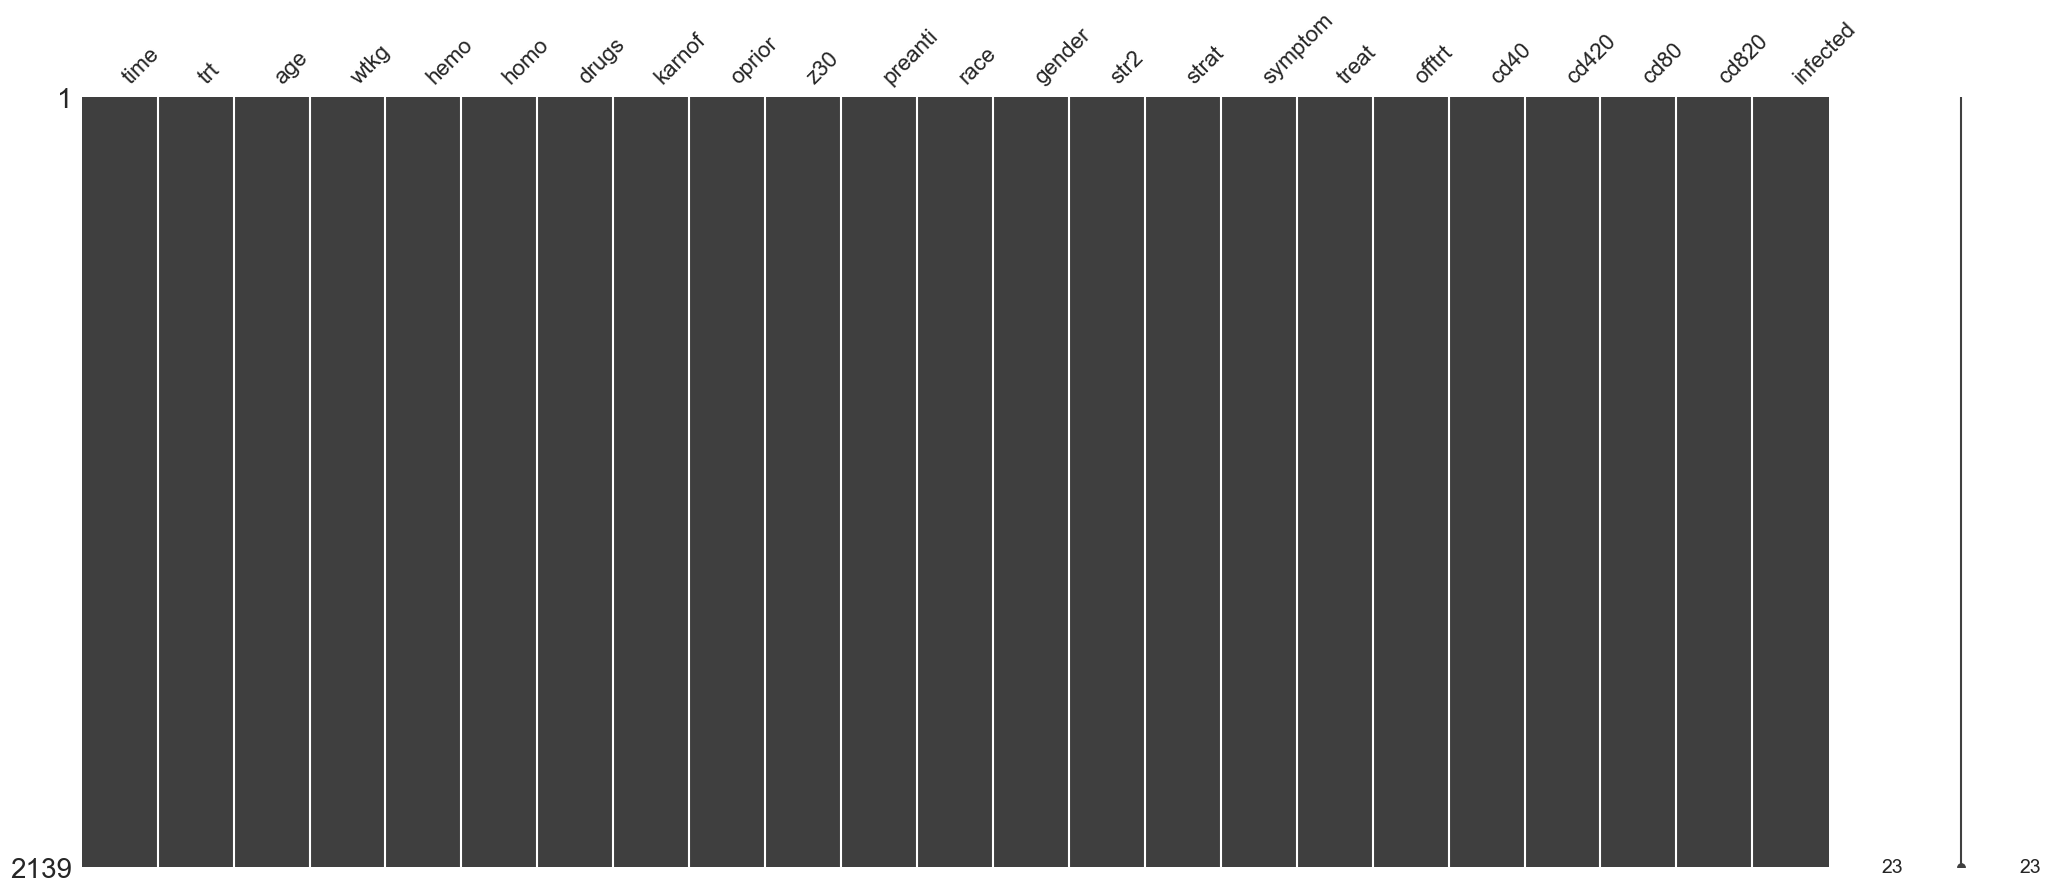

In [8]:
msno.matrix(df)

In [9]:
cat_cols = ['trt', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat',
            'offtrt']
target = 'infected'
num_cols = [i for i in df.columns if i not in cat_cols and i != target]


## Visualization

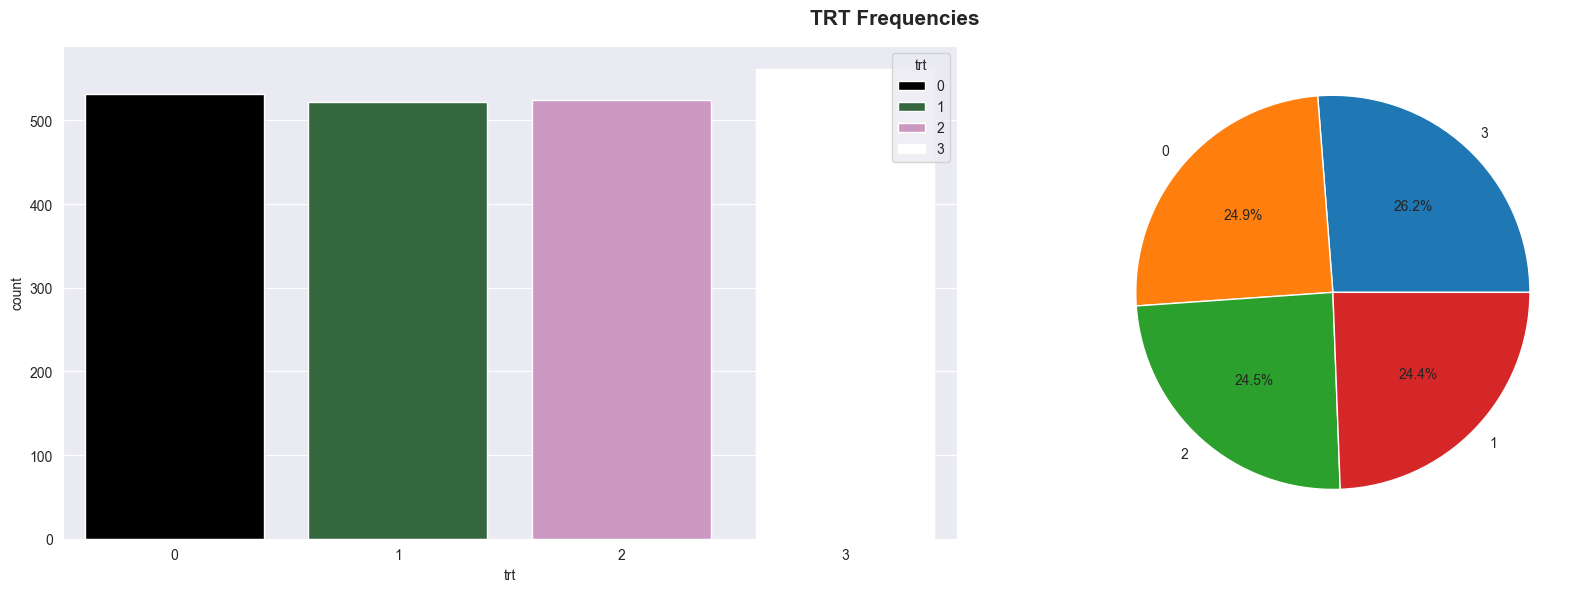

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


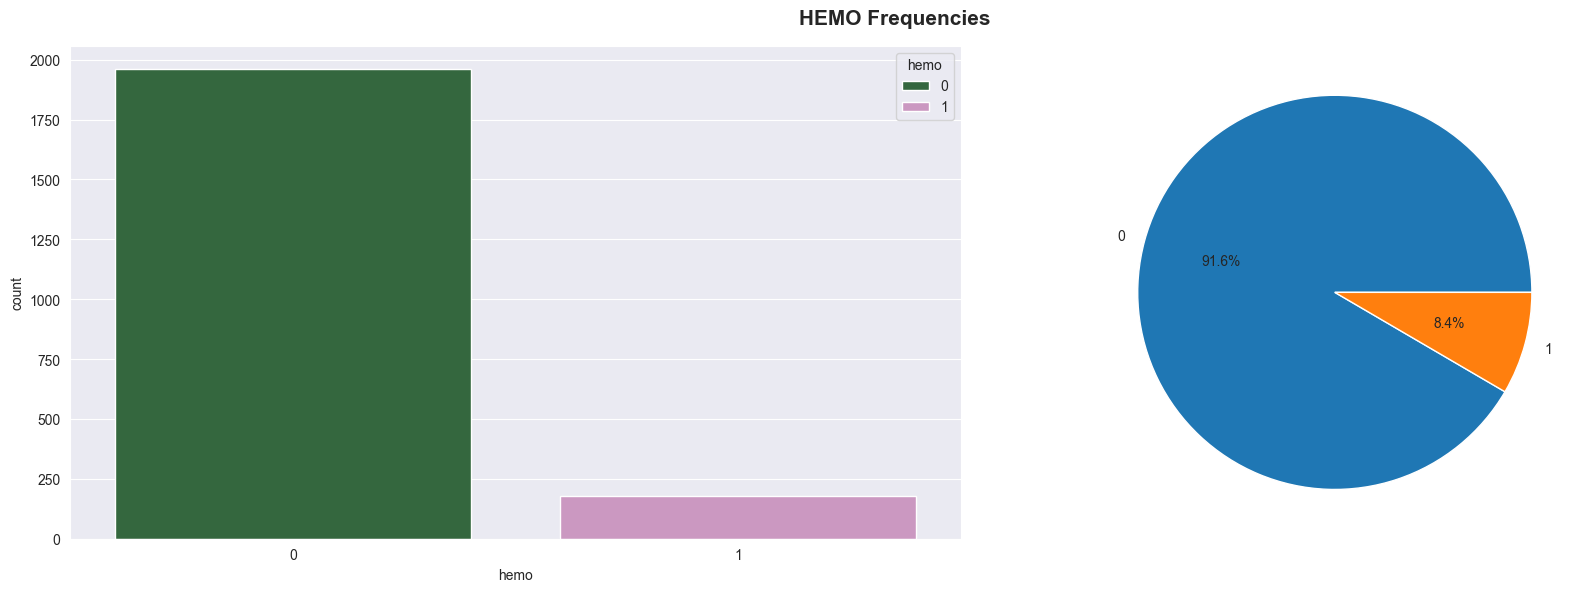

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


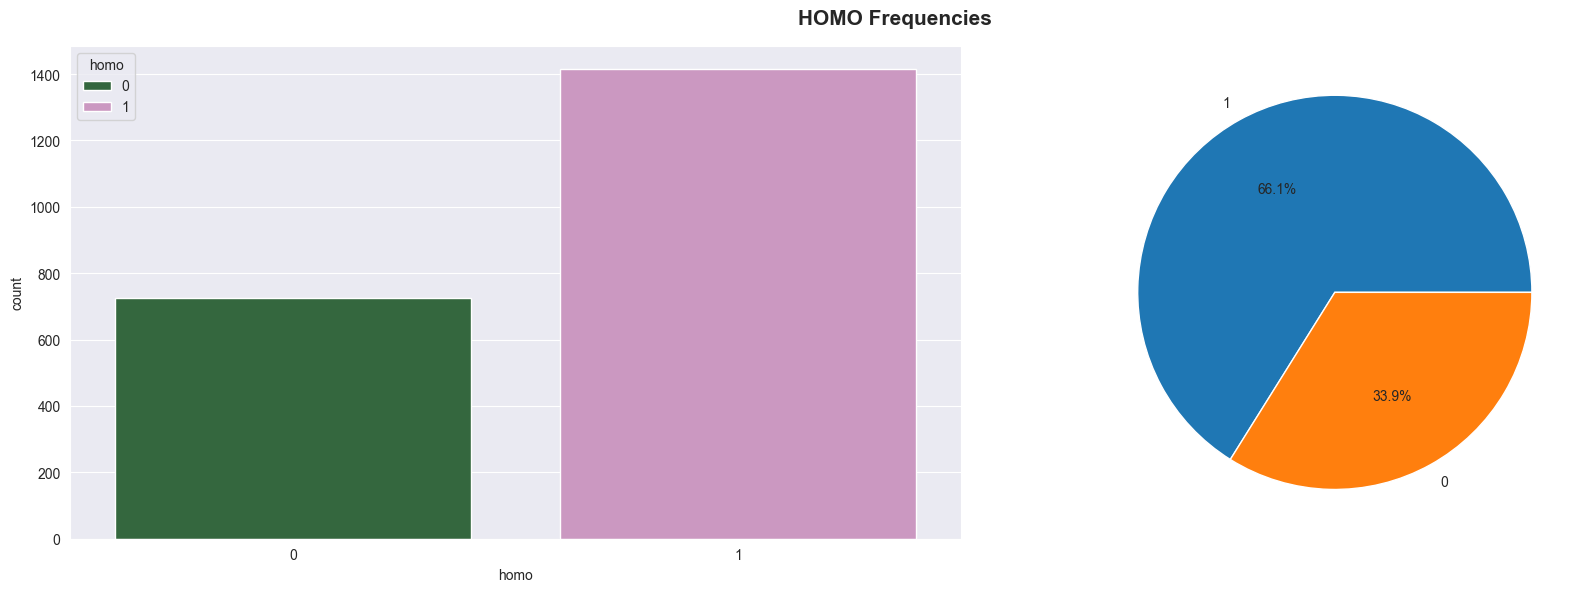

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


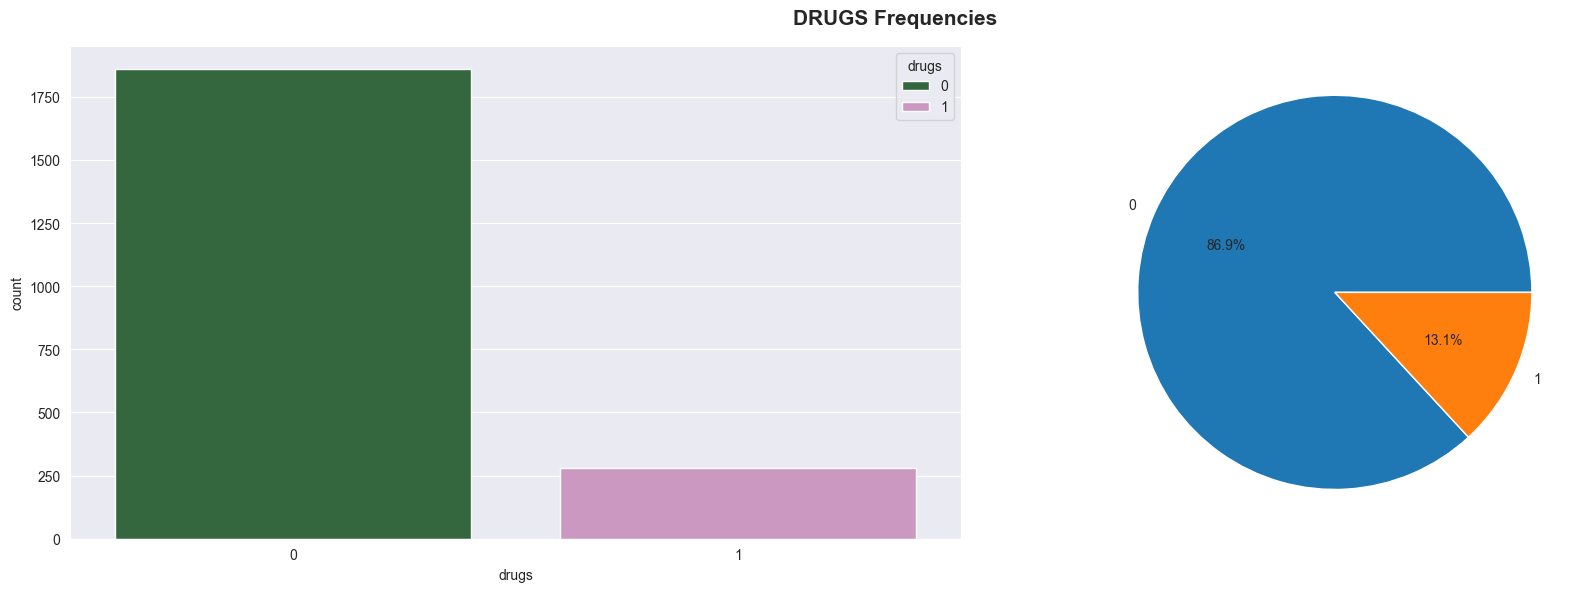

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


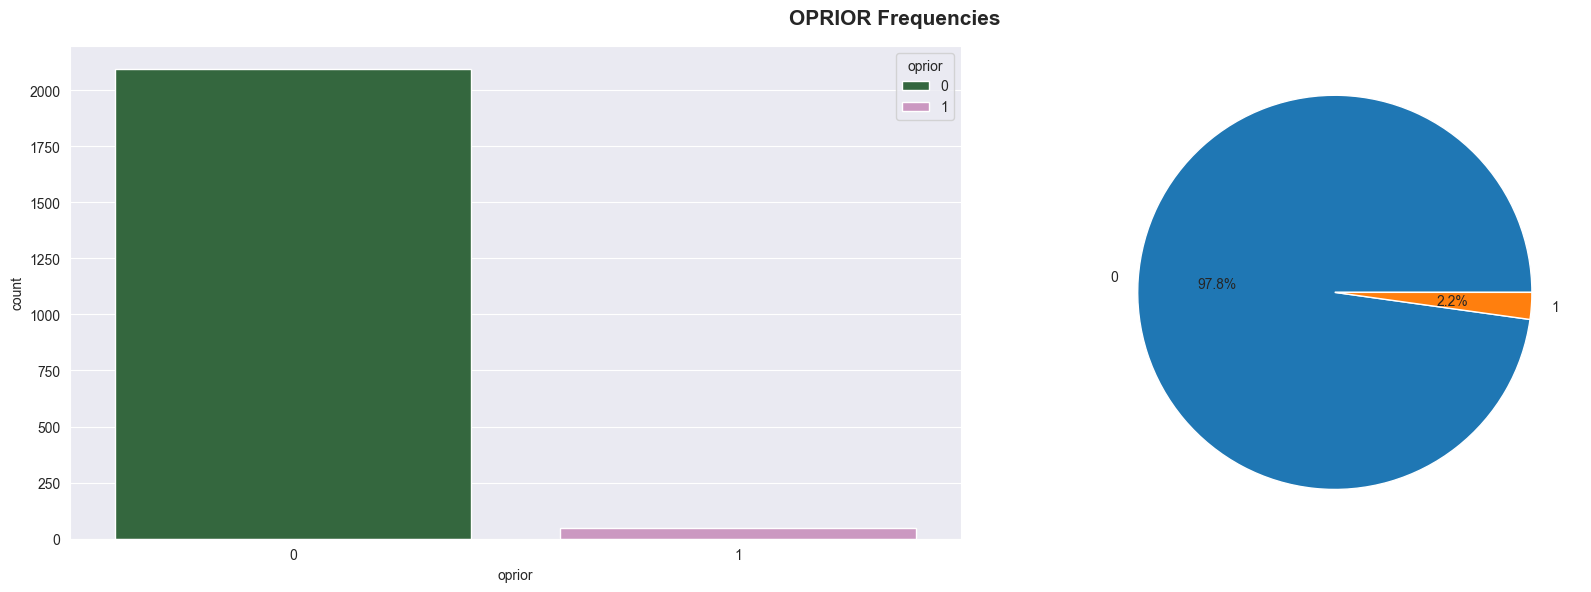

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


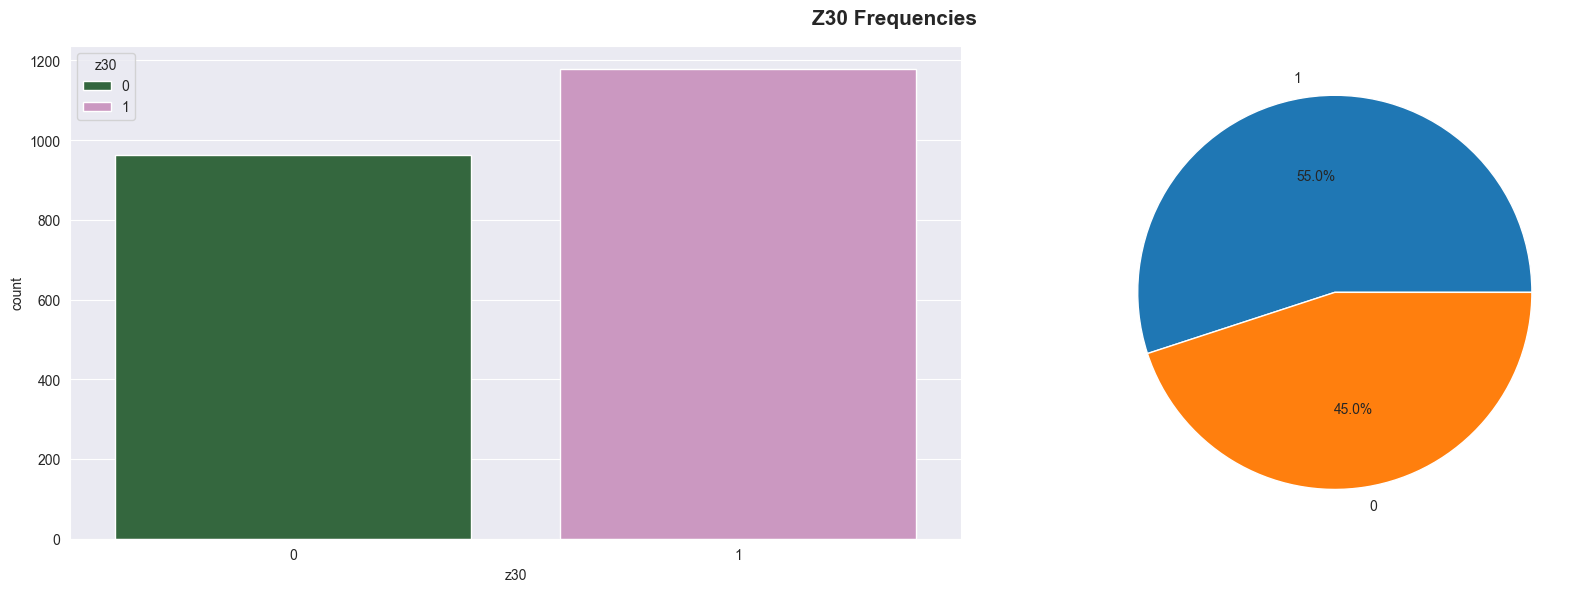

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


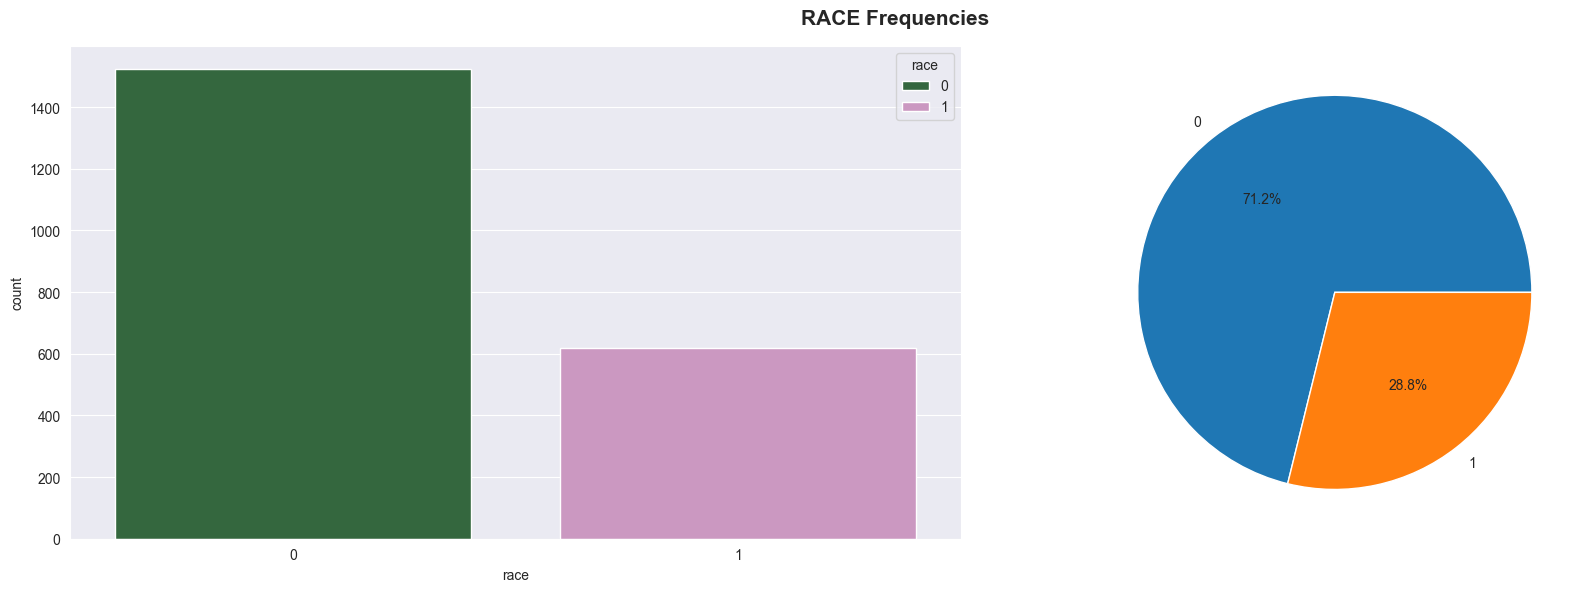

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


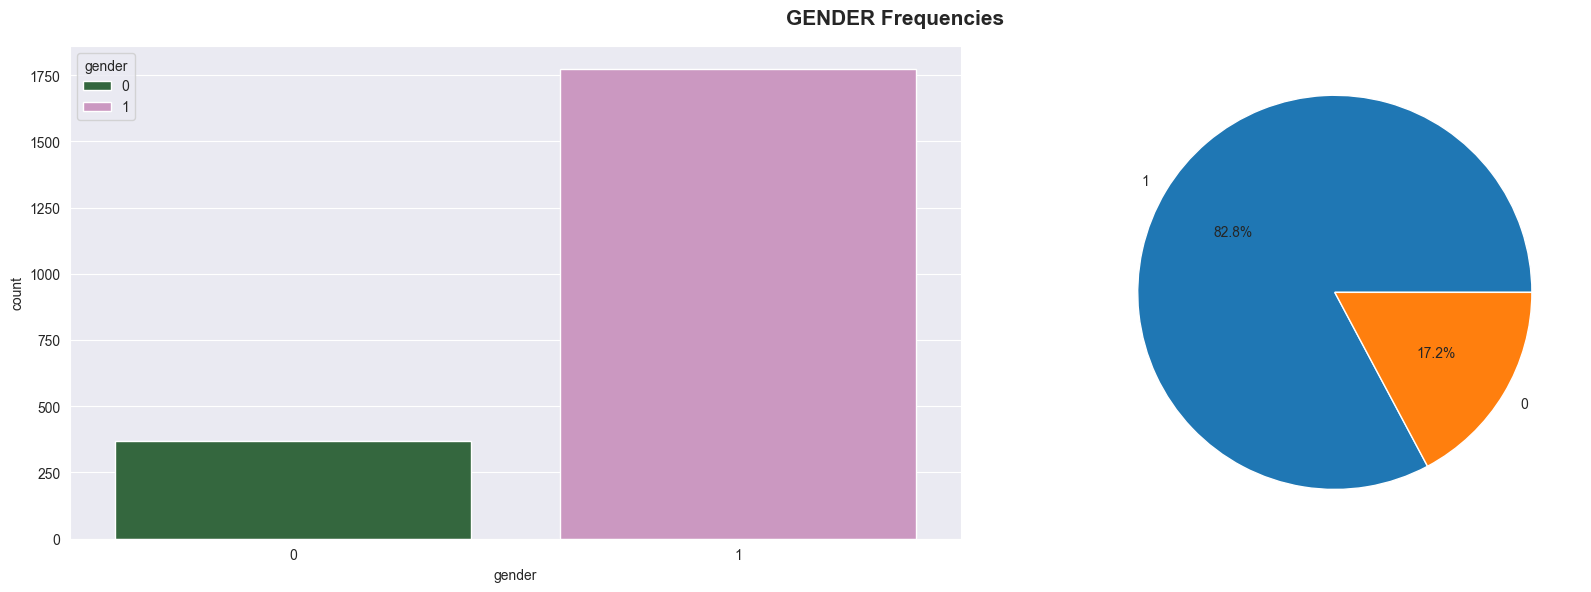

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


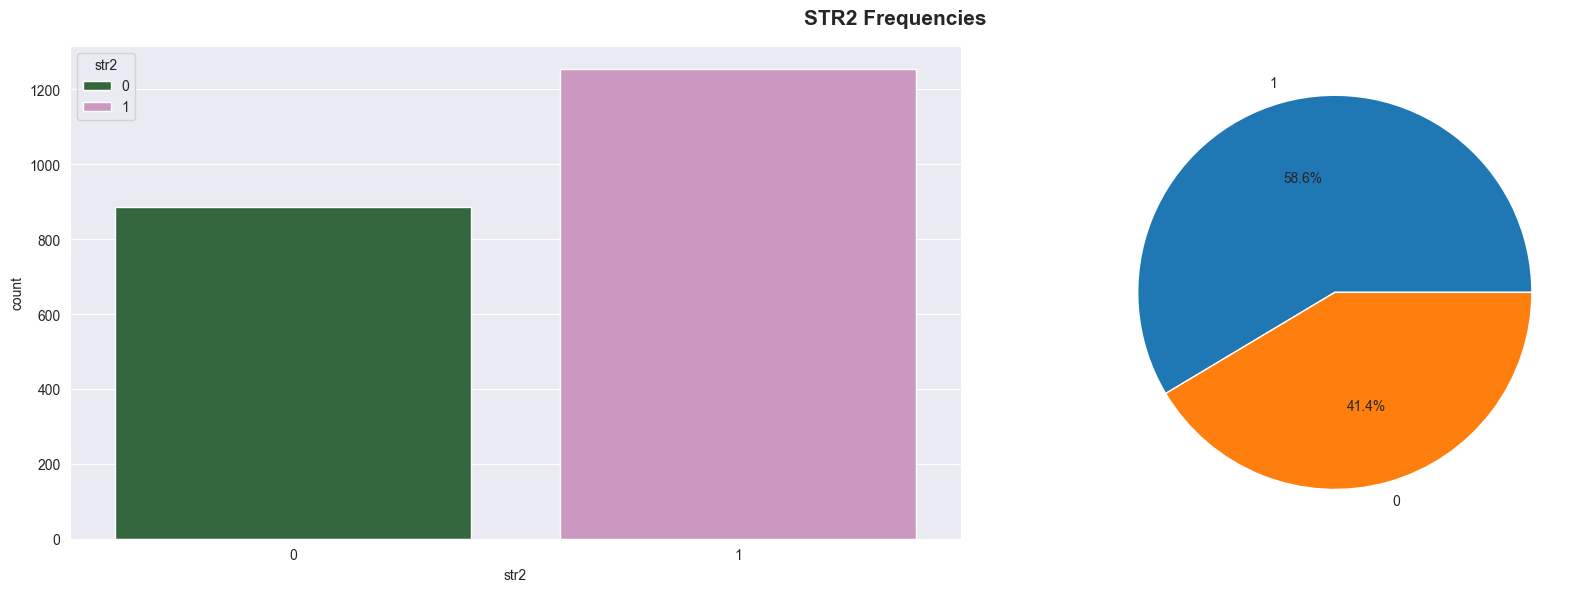

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


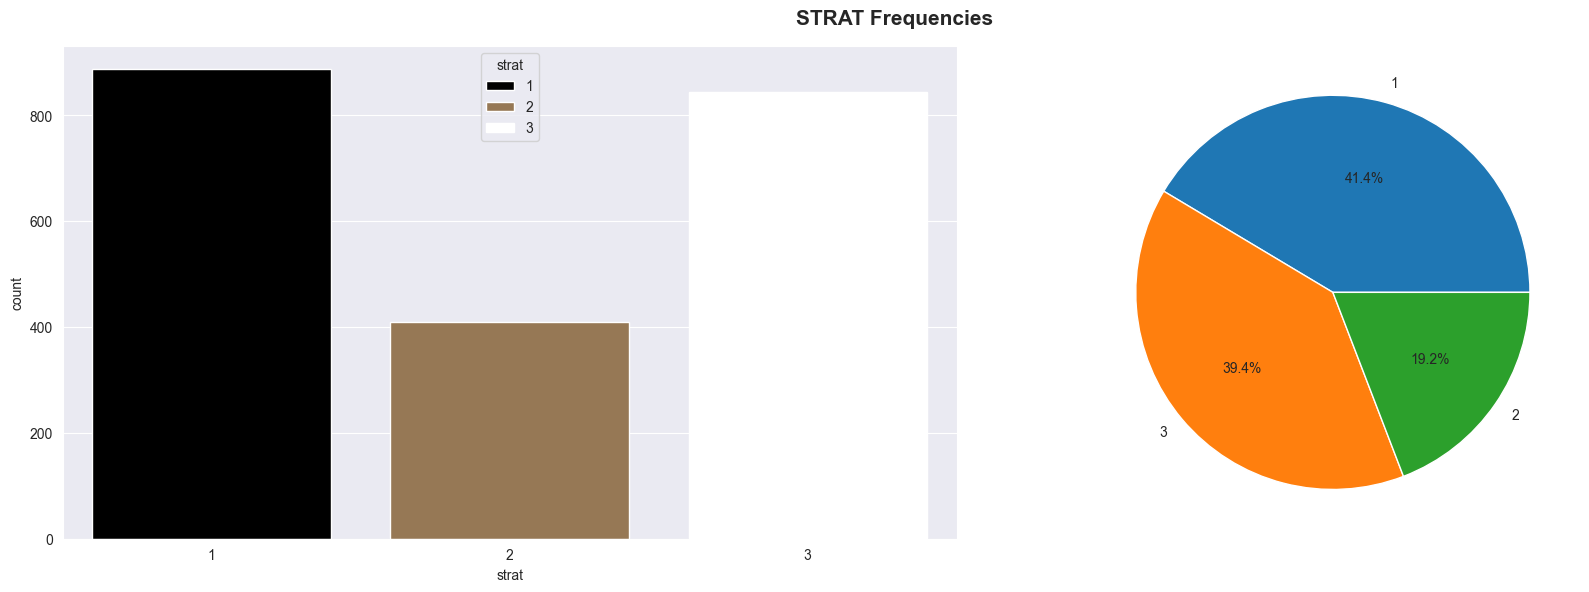

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


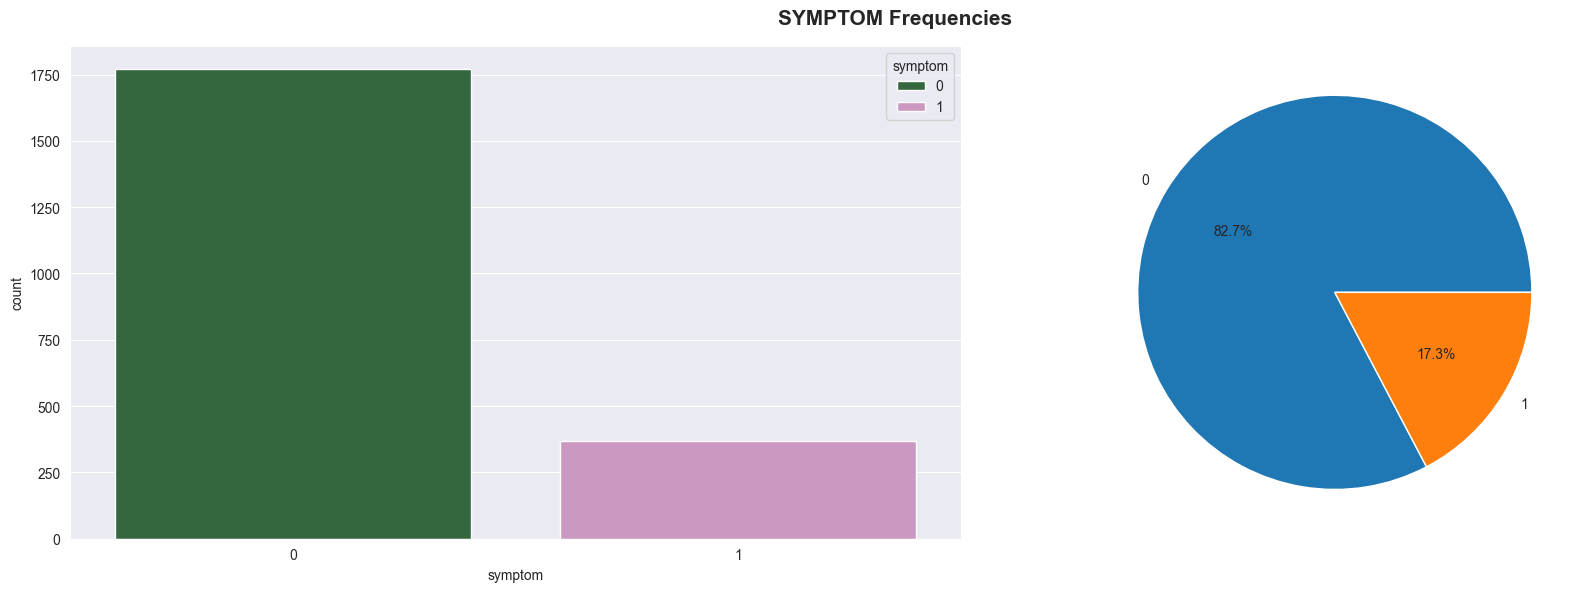

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


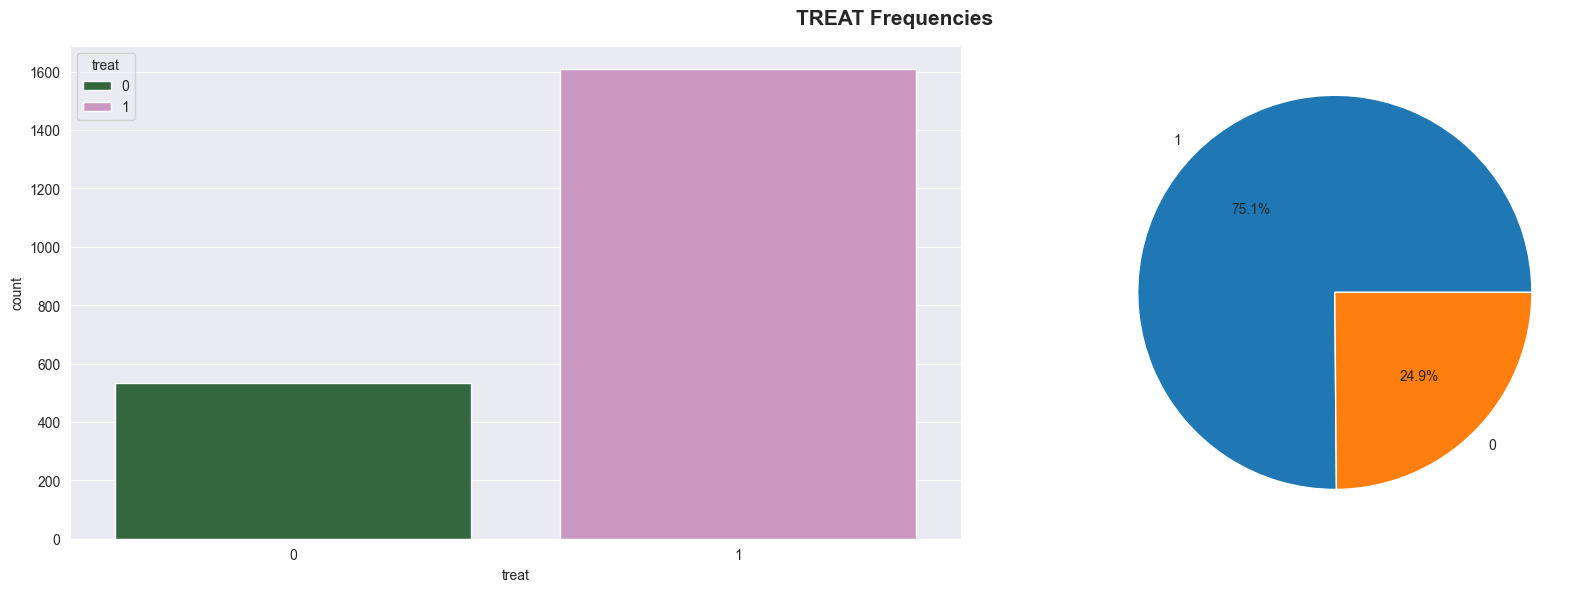

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


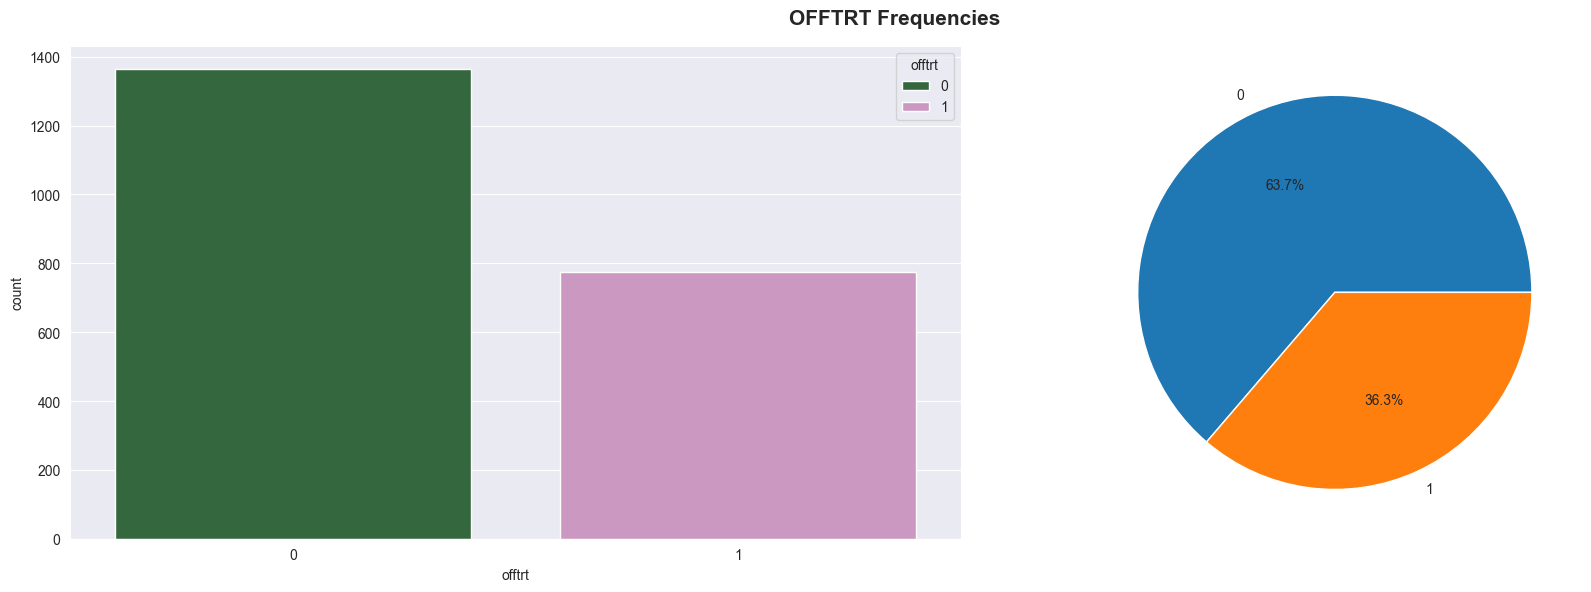

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [10]:
# Function to generate bar graph and pie chart for categorical columns
def cat_col_graph_generator(col):
    temp = df[col].value_counts()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    ax.flatten()
    sns.countplot(data=df, x=col, hue=col, palette='cubehelix', ax=ax[0])
    ax[1] = plt.pie(x=temp, labels=temp.index, autopct='%0.01f%%')
    plt.suptitle(f'{col.upper()} Frequencies', weight="bold", fontsize=15)
    fig.tight_layout()
    plt.show()


for i in cat_cols:
    cat_col_graph_generator(i)
    print("--" * 100)

<Axes: ylabel='time'>

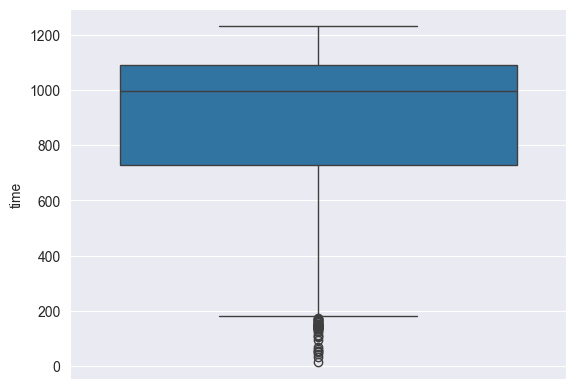

In [11]:
# boxplots for numerical columns
sns.boxplot(data=df, y="time")

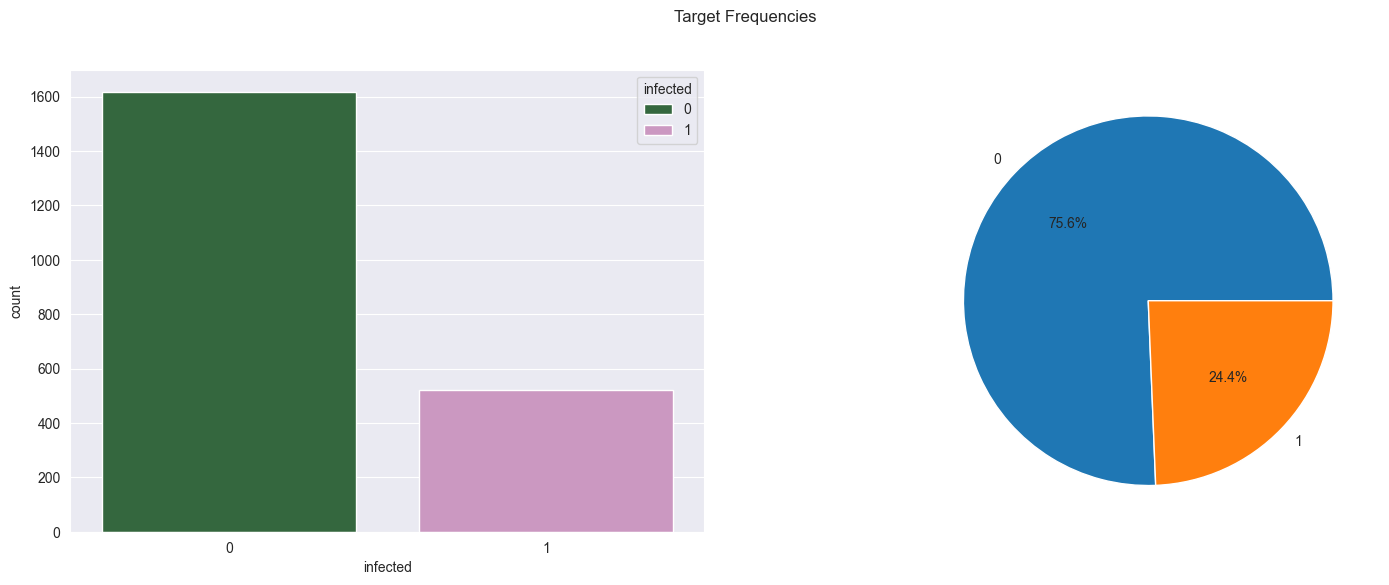

In [12]:
# target column
temp = df[target].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax.flatten()
sns.countplot(data=df, x=target, hue=target, palette='cubehelix', ax=ax[0])
ax[1] = plt.pie(x=temp, labels=temp.index, autopct='%0.01f%%')
plt.suptitle('Target Frequencies')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [14]:
X = df.drop(target, axis=1)
y = df[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_median", SimpleImputer(missing_values=np.nan, strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(strategy="most_frequent"),
        ),
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_cols),
        ("numerical", numeric_preprocessor, num_cols),
    ]
)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['trt', 'hemo', 'homo', 'drugs', 'oprior',
                                  'z30', 'race', 'gender', 'str2', 'strat',
                                  'symptom', 'treat', 'offtrt']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['time', 'age', 'wtkg', 'karnof', 'preanti',
                                  'cd40', 'cd420', 'cd80', 'cd820'])])

In [17]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [18]:
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
}

In [19]:
def model_fitter_evaluate(X_train, X_test, y_train, y_test, model_dict: dict):
    """
    Fits and evaluates each model from the models dictionary
    :param model_dict: dict of models
    :param X_train: X training data
    :param X_test: X testing data
    :param y_train: y training data
    :param y_test: y testing data
    :return: report of each model in a dataframe
    """
    names = []
    accuracies = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        names.append(name)
        accuracies.append(accuracy)
    report = pd.DataFrame({"model_name": names, "accuracy": accuracies})
    return report.sort_values(by="accuracy", ascending=False).reset_index(drop=True)


results = model_fitter_evaluate(X_train, X_test, y_train, y_test, models)

In [20]:
results

,model_name,accuracy
0,Gradient Boosting,0.887850
1,Random Forest,0.880841
2,AdaBoost,0.876168
3,XGBoost,0.873832
4,Logistic Regression,0.850467
5,Decision Tree,0.841121


In [13]:

import ydf
import pandas as pd

In [14]:
ds_path = "data/data.csv"
data = pd.read_csv(ds_path)

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [16]:
model = ydf.RandomForestLearner(label="infected", task=ydf.Task.CLASSIFICATION).train(train_df)

Train model on 1711 examples
Model trained in 0:00:00.109738


In [17]:
evaluation = model.evaluate(test_df)
print(evaluation.accuracy)

0.8878504672897196
